# 0. Importing the necessary libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
np.random.seed(0)

# Load the iris dataset
IrisData = np.loadtxt('dataset/iris.data', delimiter=',', usecols=(0, 1, 2, 3), skiprows=0)
IrisLabels = np.loadtxt('dataset/iris.data', delimiter=',', usecols=(4), dtype=str, skiprows=0)


IrisData.shape, IrisLabels.shape, IrisData.dtype, IrisLabels.dtype

((150, 4), (150,), dtype('float64'), dtype('<U15'))

## 0.1 Data Exploration

In [2]:
 IrisData[:5], IrisLabels[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa'], dtype='<U15'))

In [3]:
IrisData[-5:], IrisLabels[-5:]

(array([[6.7, 3. , 5.2, 2.3],
        [6.3, 2.5, 5. , 1.9],
        [6.5, 3. , 5.2, 2. ],
        [6.2, 3.4, 5.4, 2.3],
        [5.9, 3. , 5.1, 1.8]]),
 array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-virginica', 'Iris-virginica'], dtype='<U15'))

In [4]:
# Use Pandas
IrisDataPanda = pd.DataFrame(IrisData, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
IrisDataPanda.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 1. Data Preprocessing

## 1.1 Normalizing the data

In [5]:
# Normalizing the data using sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
IrisData = scaler.fit_transform(IrisData)
IrisData[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [6]:
# Use Pandas
IrisDataPanda = pd.DataFrame(IrisData, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
IrisDataPanda.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


## 1.2 One Hot Encoding the Labels

In [7]:
# One hot encoding the labels
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
IrisLabels = encoder.fit_transform(IrisLabels.reshape(-1, 1)).toarray()
IrisLabels[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

## 1.3 Splitting the data into training and testing sets

In [8]:
# Splitting the data into training and testing sets
np.random.seed(0)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(IrisData, IrisLabels, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

# 2. Building the Neural Network

In [9]:
# Building the Deep Neural Network 4-8-8-3
# 4 input nodes, 8 hidden nodes, 8 hidden nodes, 3 output nodes
# Using the sigmoid activation function for the hidden layers and softmax for the output layer
# Using the categorical_crossentropy loss function and adam optimizer

model = Sequential()
model.add(Dense(8, input_dim=4, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

D:\Pythons\Python3119\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

# 3. Training the Neural Network

In [10]:
# Training the Neural Network
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2712 - loss: 1.1654 - val_accuracy: 0.3667 - val_loss: 1.1314
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3527 - loss: 1.0945 - val_accuracy: 0.5667 - val_loss: 1.1214
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5702 - loss: 1.0908 - val_accuracy: 0.2000 - val_loss: 1.1172
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3961 - loss: 1.0842 - val_accuracy: 0.2000 - val_loss: 1.1165
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3768 - loss: 1.0871 - val_accuracy: 0.2000 - val_loss: 1.1076
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3839 - loss: 1.0703 - val_accuracy: 0.2000 - val_loss: 1.0993
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5507 - loss: 1.0643 - val_accuracy: 0.2000 - val_loss: 1.0962
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4062 - loss: 1.0539 - val_accu

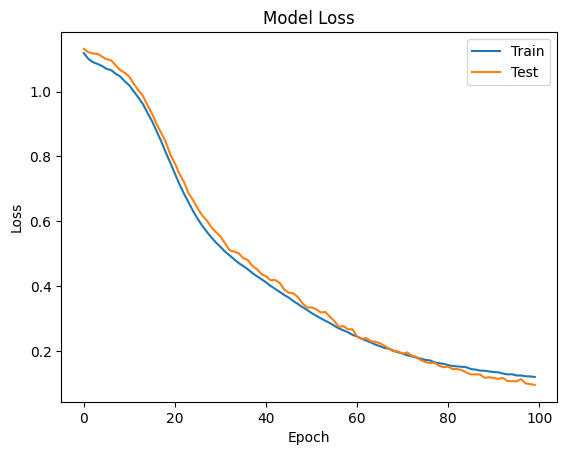

In [11]:
# Plotting the loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# 4. Evaluating the Neural Network

In [12]:
y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [13]:
# Evaluating the Neural Network accuracy, precision, recall, f1-score, classification report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
y_pred_result = np.argmax(y_pred, axis=1)
y_test_result = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_result, y_pred_result)
print('Accuracy: ', accuracy)
print(classification_report(y_test_result, y_pred_result))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


In [14]:
# List out the test data X, predicted y and actual y as one whole table


y_pred = model.predict(X_test)
y_pred_result = np.argmax(y_pred, axis=1)
y_test_result = np.argmax(y_test, axis=1)

# Transform X back to the original scale
X_test_transform = scaler.inverse_transform(X_test)
X_test_transform = np.round(X_test_transform, 2)


# Transform y back to the original text using dict 0 is Iris-setosa, 1 is Iris-versicolor, 2 is Iris-virginica
dictPetal = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
y_pred_result = np.vectorize(dictPetal.get)(y_pred_result)
y_test_result = np.vectorize(dictPetal.get)(y_test_result)

comparison = np.concatenate((X_test_transform, y_pred_result.reshape(-1, 1), y_test_result.reshape(-1, 1)), axis=1)
comparison = pd.DataFrame(comparison, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Predicted', 'Actual'])
comparison[:30]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


,Sepal Length,Sepal Width,Petal Length,Petal Width,Predicted,Actual
0,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica
1,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-versicolor
2,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa
3,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica
4,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa
5,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica
6,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa
7,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor
8,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor
9,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-versicolor
